# Problem Statement :

#### About the Dataset\n
- **Age:** Describes the age of individuals. Continuous.
- **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** Continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** Number of years spent in education. Continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** Continuous.
- **capital-loss:** Continuous.
- **hours-per-week:** Continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **salary:** >50K,<=50K"

# Import all the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option("display.max_columns",15)
sns.set(rc={"figure.figsize":(15,16)})

## Read the data

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#getting brief info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning and preprocessing

In [8]:
# Check null values in our complete dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
# check the duplicates in data
df.duplicated().sum()

24

In [10]:
# drop duplicated
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.index = range(0,df.shape[0],1)

In [13]:
df.rename(columns = {
    "education.num" : "education_num","marital.status" : "marital_status","capital.gain" : "capital_gain",
    "capital.loss" : "capital_loss","hours.per.week" : "hours_per_week","native.country" : "native_country"
},inplace = True)

In [14]:
# seprate the features into categorical and continous
cat = []
con = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)

In [15]:
cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [16]:
con

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [17]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
for i in cat:
    print(i,df[i].unique())
    
    print()
    print("***************************************************************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

***************************************************************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

***************************************************************************

marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

***************************************************************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

************************************************************************

In [19]:
df["workclass"] = df["workclass"].replace("?",df["workclass"].mode()[0])
df["occupation"] = df["occupation"].replace("?",df["occupation"].mode()[0])
df["native_country"] = df["native_country"].replace("?",df["native_country"].mode()[0])

In [20]:
df[["workclass","occupation","native_country"]]

,workclass,occupation,native_country
0,Private,Prof-specialty,United-States
1,Private,Exec-managerial,United-States
2,Private,Prof-specialty,United-States
3,Private,Machine-op-inspct,United-States
4,Private,Prof-specialty,United-States
...,...,...,...
32532,Private,Protective-serv,United-States
32533,Private,Tech-support,United-States
32534,Private,Machine-op-inspct,United-States
32535,Private,Adm-clerical,United-States


In [21]:
#OutLiers Removal
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Q = pd.DataFrame(sc.fit_transform(df[con]),columns=con)

In [22]:
W = []
for i in Q.columns:
    W.extend(list(Q[(Q[i]>3)|(Q[i]<-3)].index))

In [23]:
from numpy import unique
outliers = list(unique(W))

In [24]:
len(outliers)

2728

In [25]:
df = df.drop(index=outliers,axis=0)

In [26]:
df.index = range(0,df.shape[0],1)

In [27]:
df.shape

(29809, 15)

In [28]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,62,Local-gov,159908,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1258,38,United-States,<=50K
1,72,Local-gov,144515,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1258,40,United-States,<=50K
2,76,Private,224680,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1258,20,United-States,<=50K
3,66,Private,350498,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1258,20,United-States,<=50K
4,33,Local-gov,262042,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,1138,40,United-States,<=50K


## Data Analysis and Data Visulization

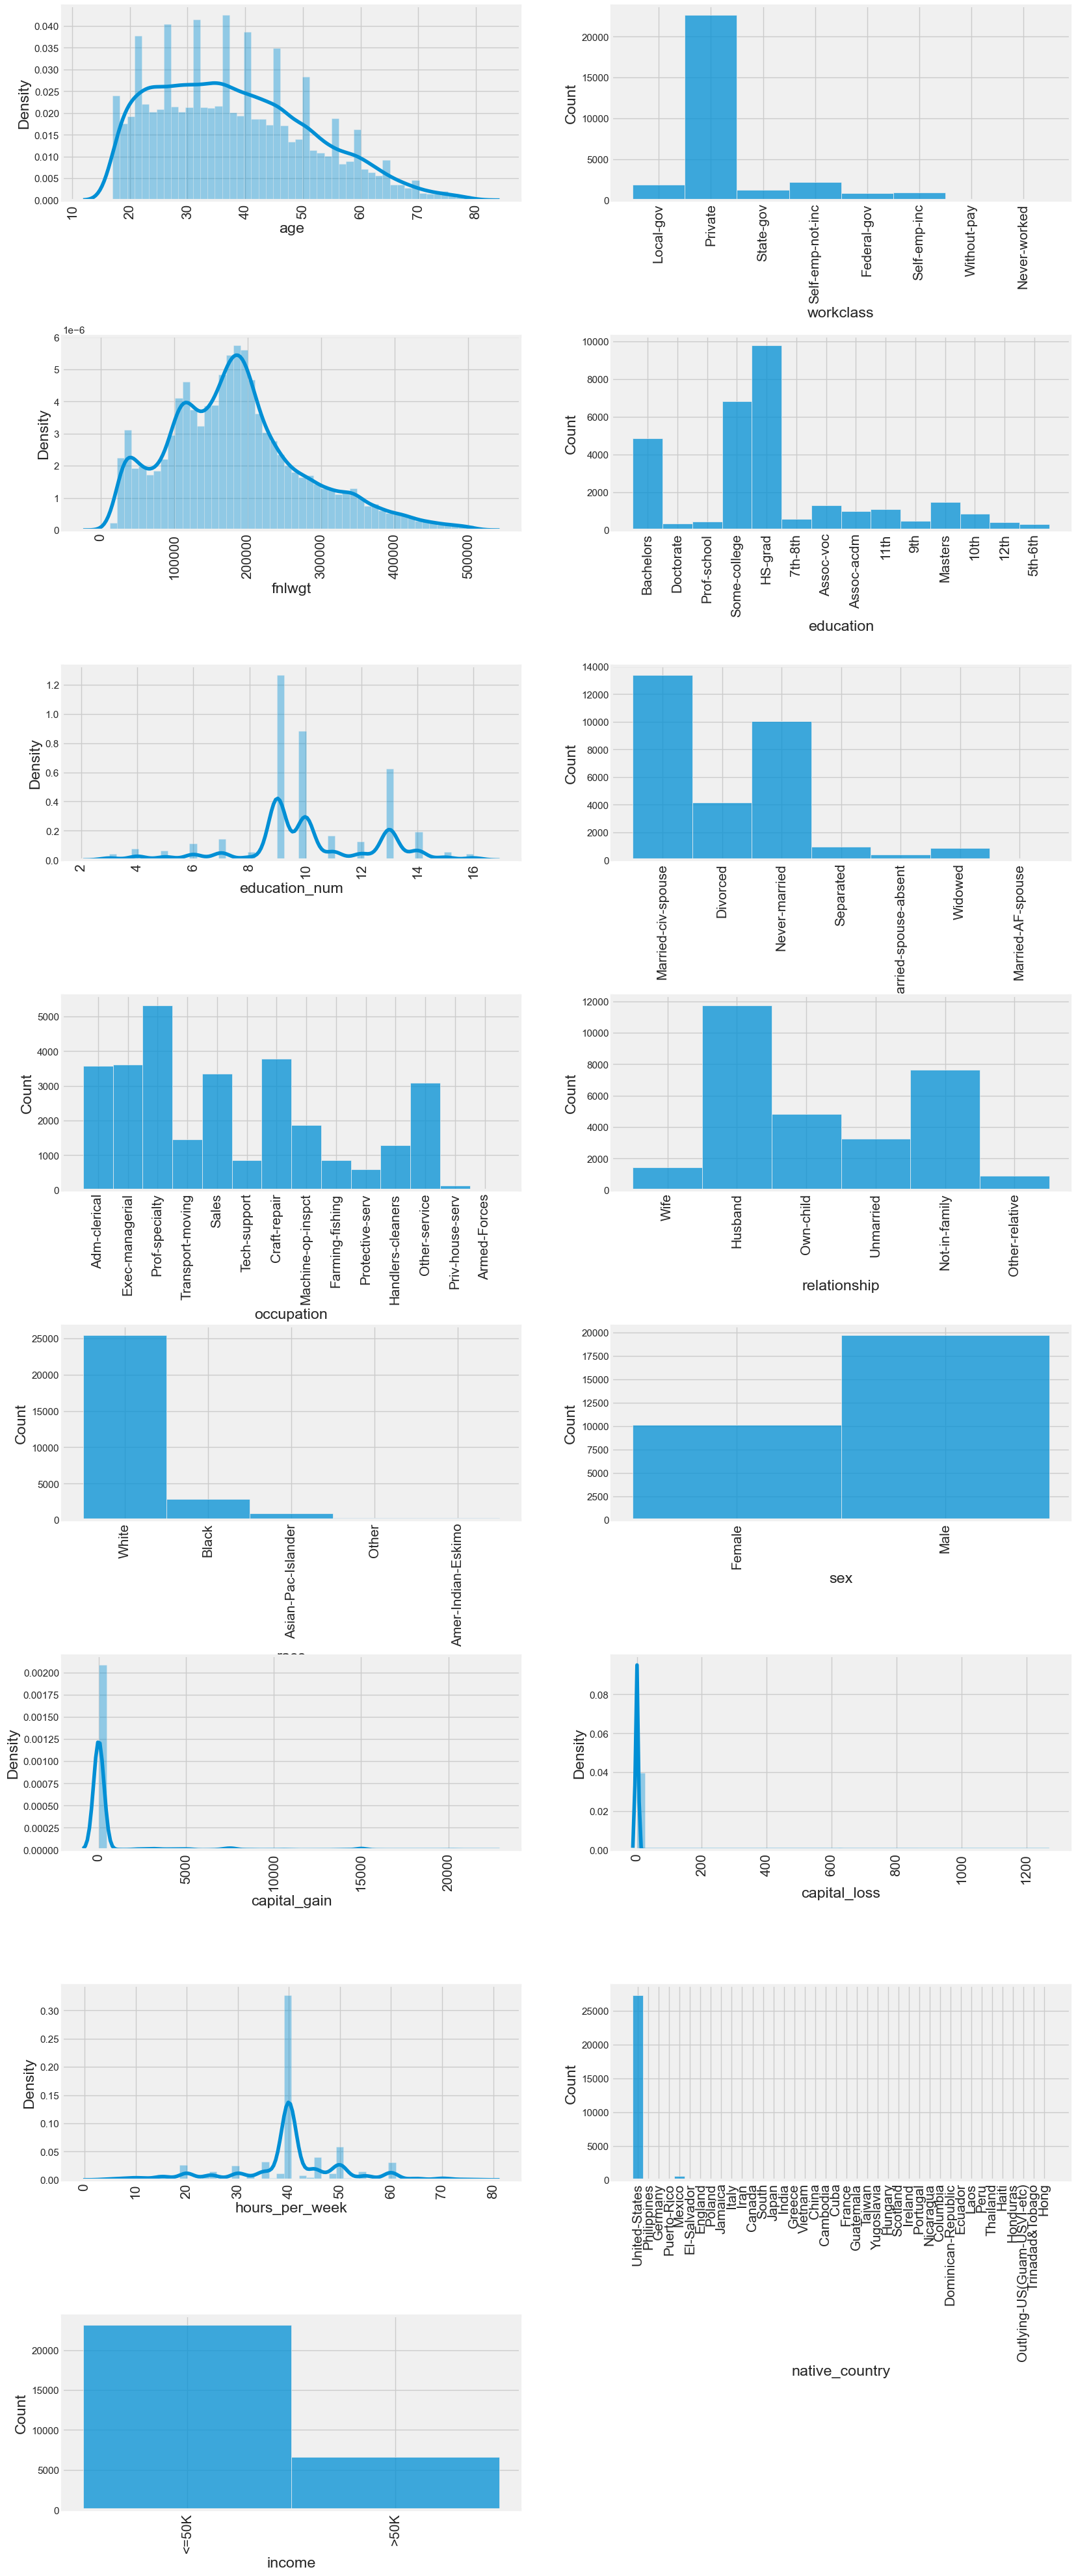

In [29]:
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace=0.7)
plt.style.use('fivethirtyeight')
x = 1
for i in df.columns:
    if(df[i].dtypes == "object"):
        plt.subplot(8,2,x)
        sns.histplot(df[i])
        x = x + 1
    else:
        plt.subplot(8,2,x)
        sns.distplot(df[i])
        x = x + 1
    plt.xticks(size=15,rotation=90)

In [30]:
def chisquare(cat1,cat2,df):
    import pandas as pd
    Q = pd.crosstab(df[cat1],df[cat2])
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(Q)
    return b

In [31]:
chisquare("income","occupation",df)

0.0

In [32]:
for i in cat:
    e = chisquare(i,"income",df)
    e = round(e,2)
    print("income ~",i,"--->",e)

income ~ workclass ---> 0.0
income ~ education ---> 0.0
income ~ marital_status ---> 0.0
income ~ occupation ---> 0.0
income ~ relationship ---> 0.0
income ~ race ---> 0.0
income ~ sex ---> 0.0
income ~ native_country ---> 0.0
income ~ income ---> 0.0


In [33]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols 
    from statsmodels.stats.anova import anova_lm
    st = con + " ~ " + cat
    model = ols(st,df).fit()
    Q = anova_lm(model)
    anv = round(Q.iloc[0,-1],4)
    return anv

In [34]:
for i in con:
    e = ANOVA(df,"income",i)
    e = round(e,4)
    print("income ~",i,"--->",e)

income ~ age ---> 0.0
income ~ fnlwgt ---> 0.1146
income ~ education_num ---> 0.0
income ~ capital_gain ---> 0.0
income ~ capital_loss ---> 0.0041
income ~ hours_per_week ---> 0.0


#### relation between income and fnlwgt is so weak so we will drop this column

In [35]:
df.drop(labels=["education_num","fnlwgt"],axis = 1,inplace=True)

In [36]:
df.head(3)

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,62,Local-gov,Bachelors,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1258,38,United-States,<=50K
1,72,Local-gov,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1258,40,United-States,<=50K
2,76,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1258,20,United-States,<=50K


In [37]:
# seprate the features into categorical and continous
cat = []
con = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)

In [38]:
cat.remove("income")
cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [39]:
con

['age', 'capital_gain', 'capital_loss', 'hours_per_week']

In [40]:
from sklearn.preprocessing import MinMaxScaler
Global_MS = MinMaxScaler()
X1=pd.DataFrame(Global_MS.fit_transform(df[con]),columns=con)
X2=pd.get_dummies(df[cat])
df_new=X1.join(X2)

In [41]:
df_new.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.725806,0.0,1.00000,0.465753,0,1,0,...,0,0,0,0,1,0,0
1,0.887097,0.0,1.00000,0.493151,0,1,0,...,0,0,0,0,1,0,0
2,0.951613,0.0,1.00000,0.219178,0,0,0,...,0,0,0,0,1,0,0
3,0.790323,0.0,1.00000,0.219178,0,0,0,...,0,0,0,0,1,0,0
4,0.258065,0.0,0.90461,0.493151,0,1,0,...,0,0,0,0,1,0,0


In [42]:
from sklearn.preprocessing import LabelEncoder
# create a LabelEncoder object
le = LabelEncoder()
df["income"] = le.fit_transform(df["income"])

In [43]:
df.head(3)

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,62,Local-gov,Bachelors,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1258,38,United-States,0
1,72,Local-gov,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1258,40,United-States,0
2,76,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1258,20,United-States,0


In [44]:
df_new["income"] = df["income"]

In [45]:
df_new

,age,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
0,0.725806,0.0,1.00000,0.465753,0,1,0,...,0,0,0,1,0,0,0
1,0.887097,0.0,1.00000,0.493151,0,1,0,...,0,0,0,1,0,0,0
2,0.951613,0.0,1.00000,0.219178,0,0,0,...,0,0,0,1,0,0,0
3,0.790323,0.0,1.00000,0.219178,0,0,0,...,0,0,0,1,0,0,0
4,0.258065,0.0,0.90461,0.493151,0,1,0,...,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29804,0.080645,0.0,0.00000,0.493151,0,0,0,...,0,0,0,1,0,0,0
29805,0.161290,0.0,0.00000,0.465753,0,0,0,...,0,0,0,1,0,0,0
29806,0.370968,0.0,0.00000,0.493151,0,0,0,...,0,0,0,1,0,0,1
29807,0.661290,0.0,0.00000,0.493151,0,0,0,...,0,0,0,1,0,0,0


In [46]:
df_new.to_csv("cleandata.csv",index=False)

In [47]:
df_new.shape

(29809, 101)

In [48]:
x = df_new.drop("income",axis=1)
y = df_new["income"]

In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23847, 100)
(5962, 100)
(23847,)
(5962,)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [53]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore

# Logistic Regression Model

In [54]:
lr = LogisticRegression()

In [55]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']   
}

In [56]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [57]:
from sklearn import set_config
set_config(display='diagram')

In [58]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [59]:
grid.best_params_

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [60]:
grid.score(X_train,y_train)

0.8050907871011028

In [61]:
y_prad = grid.predict(X_test)

In [62]:
accuracy_score(y_test,y_prad)

0.8037571284803757

# Decision Tree Model

In [63]:
dr = DecisionTreeClassifier()

In [64]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [65]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [66]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [68]:
grid_search.score(X_train,y_train)

0.7659663689352958

In [69]:
y_prad = grid_search.predict(X_test)

In [70]:
accuracy_score(y_test,y_prad)

0.7678631331767863

In [71]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      4696
           1       0.47      0.82      0.60      1266

    accuracy                           0.77      5962
   macro avg       0.71      0.79      0.72      5962
weighted avg       0.84      0.77      0.79      5962



# Random Forest Model

In [72]:
rf = RandomForestClassifier()

In [73]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [74]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [75]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [76]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 30}

In [77]:
grid_search.score(X_train,y_train)

0.7767434058791463

In [78]:
y_prad = grid_search.predict(X_test)

In [79]:
accuracy_score(y_test,y_prad)

0.7660181147266019

In [80]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      4696
           1       0.47      0.89      0.62      1266

    accuracy                           0.77      5962
   macro avg       0.72      0.81      0.72      5962
weighted avg       0.86      0.77      0.79      5962



### we can conclude that Logistic Regression give the best accuracy